<a href="https://colab.research.google.com/github/minjiontheroad/seoul-bike-demand/blob/main/demand_analysis_seoulbike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preview

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding = 'latin-1')
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.isnull().sum() #check no missing data

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [4]:
df.rename(columns={'Temperature(°C)': 'Temperature',
                   'Humidity(%)': 'Humidity',
                   'Wind speed (m/s)': 'Wind Speed',
                   'Visibility (10m)': 'Visibility',
                   'Dew point temperature(°C)': 'Dew Point',
                   'Solar Radiation (MJ/m2)': 'Solar Radiation',
                   'Rainfall(mm)': 'Rainfall',
                   'Snowfall (cm)': 'Snowfall'},
          inplace=True)

In [5]:
df[(df['Functioning Day'] == 'No') & (df['Rented Bike Count'] != 0)] #check no bikes rented on no-functioning days

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day


# Exploratory Data Analysis
In this section, I will use the records from functioning days only.

In [6]:
df = df[df['Functioning Day'] == 'Yes'] #keep functioning days only

In [51]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.strftime('%a')  # e.g., 'Mon', 'Tue'
df['Weekend'] = (df['Day'] == 'Sat') | (df['Day'] == 'Sun')
df['Work Day'] = (df['Weekend'] == False) & (df['Holiday'] == "No Holiday")

bar_data = df.groupby('Month')['Rented Bike Count'].mean().reset_index()
line_data = df.groupby('Month')['Temperature'].mean().reset_index()
line_data['Month'] = line_data['Month'] -1

In [52]:
df[df['Day']== "Fri"].head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Day,Weekend,Work Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Fri,False,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Fri,False,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Fri,False,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Fri,False,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Fri,False,True


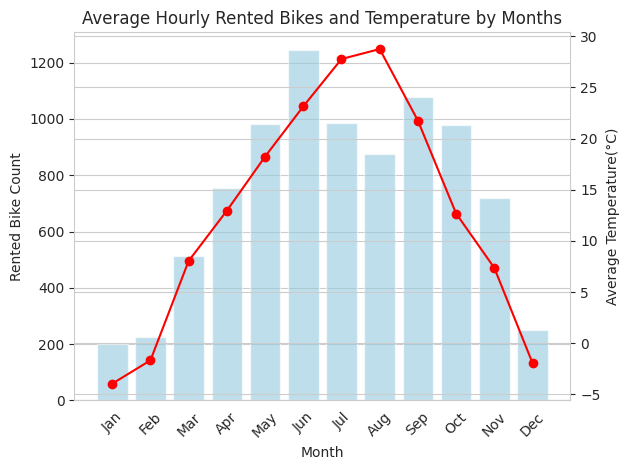

In [8]:
import seaborn as sns

sns.set_style("whitegrid")

fig, ax1 = plt.subplots()

# Bar plot
sns.barplot(data=bar_data, x='Month', y='Rented Bike Count', ax=ax1, color='skyblue', alpha=.6)
sns.despine(left = True)
ax1.set_ylabel('Rented Bike Count')

# Line plot
ax2 = ax1.twinx()
ax2.plot(line_data['Month'], line_data['Temperature'], color='red', marker='o', label='Temperature')
ax2.set_ylabel('Average Temperature(°C)')

ax1.set_title('Average Hourly Rented Bikes and Temperature by Months')
ax1.set_xticks(range(0,12))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
fig.tight_layout()
plt.show()


* In the graph above, the blue bar shows the average number of hourly rented bikes by month, while the red line shows the average temperature of the month.
* The demand for bike is highest in June and September; it drops sharply during winter, December to February.
* The graph suggests a non-linear relationship between he temperature and the demand for rental bikes. In general, they move in the same direction during a year, with an exception of summer, when the demand drops as the temperature goes too high.

Text(0.5, 1.0, 'Average Hourly Rented Bikes by Seasons')

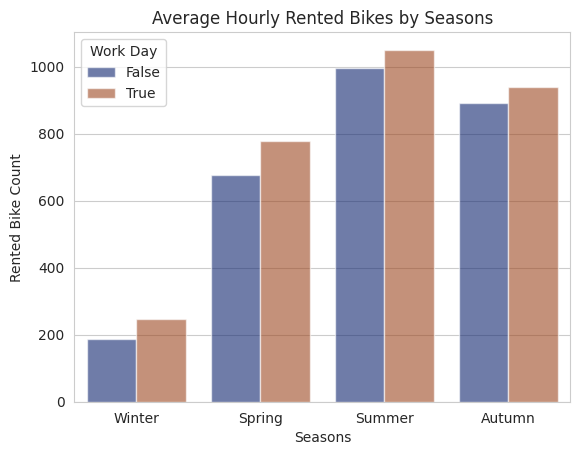

In [53]:
g_seasons = sns.barplot(data = df,
                        x = "Seasons", y = "Rented Bike Count", hue = "Work Day", palette = "dark", alpha = .6,
                        errorbar = None)
g_seasons.set_title("Average Hourly Rented Bikes by Seasons")

* The average number of bikes is highest during summer, lowest during winter as monthly analysis showed above.
* The difference between working days and non-working days(holidays and weekends) does not seem significant by season.

Text(0.5, 1.0, 'Average Hourly Rented Bikes by Hours')

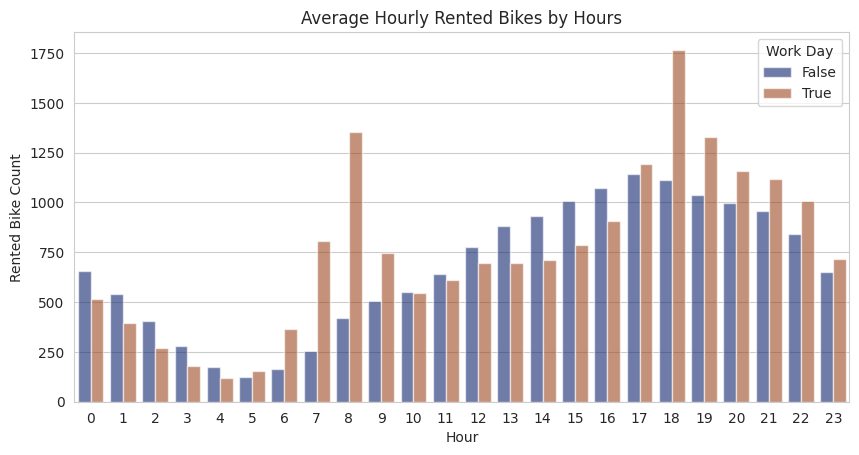

In [54]:
plt.figure(figsize=(10, 4.8))
g_hours = sns.barplot(data = df,
                        x = "Hour", y = "Rented Bike Count", hue = "Work Day", palette = "dark", alpha = .6,
                        errorbar = None)
g_hours.set_title("Average Hourly Rented Bikes by Hours")

* Hourly analysis shows high demand for bikes during morning commute(6-9) and after work(17-23) on working days.

# Demand Analysis using XG Boost Model
In this section, I use machine learning technique to predict the demand for bike share in Seoul.

## Data Preprocessing

In [57]:
df.dtypes

,0
Date,datetime64[ns]
Rented Bike Count,int64
Hour,int64
Temperature,float64
Humidity,int64
Wind Speed,float64
Visibility,int64
Dew Point,float64
Solar Radiation,float64
Rainfall,float64


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X = df[['Hour', 'Temperature', 'Humidity', 'Wind Speed', 'Visibility',
       'Dew Point', 'Solar Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Work Day']]
y = df['Rented Bike Count']

# Encode categorical features
categorical_col = X.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col)
    ],
    remainder='passthrough'  # Keep all other (non-categorical) columns
)

X_enc = encoder.fit_transform(X)

# Get feature names
all_col = X.columns.tolist()
numerical_col = [col for col in all_col if col not in categorical_col]

categorical_enc = encoder.named_transformers_['cat'].get_feature_names_out(categorical_col)

all_col_enc = list(categorical_enc) + numerical_col

# Convert back to DataFrame
X_enc_df = pd.DataFrame(X_enc, columns=all_col_enc)

# Split the training and test set
X_train, X_test, y_train, y_test = train_test_split(X_enc_df, y, test_size = 0.25, random_state = 123)


## Training

In [59]:
import xgboost as xgb
from xgboost import XGBRegressor

# Train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=123)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

## Prediction and Test Set Comparison

In [60]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_pred = model.predict(X_test)

y_test_series = pd.Series(y_test, name='Actual')
y_pred_series = pd.Series(y_pred, name='Prediction')

# Combine
Test_df = pd.concat([X_test, y_test_series, y_pred_series], axis=1)
Test_df.head()

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Work Day_False,Work Day_True,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point,Solar Radiation,Rainfall,Snowfall,Actual,Prediction
0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,22.8,98.0,0.0,1734.0,22.4,0.00,0.0,0.0,233,309.950195
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19.0,57.0,1.6,2000.0,10.2,0.00,0.0,0.0,1217,1094.630615
2,0.0,1.0,0.0,0.0,0.0,1.0,6.0,3.1,89.0,0.2,903.0,1.4,0.00,1.5,0.0,32,62.962093
3,0.0,1.0,0.0,0.0,1.0,0.0,18.0,6.4,43.0,3.7,2000.0,-5.2,0.92,0.0,0.0,714,626.718445
4,0.0,0.0,1.0,0.0,0.0,1.0,19.0,23.9,51.0,2.3,2000.0,13.1,0.12,0.0,0.0,2788,2466.117676


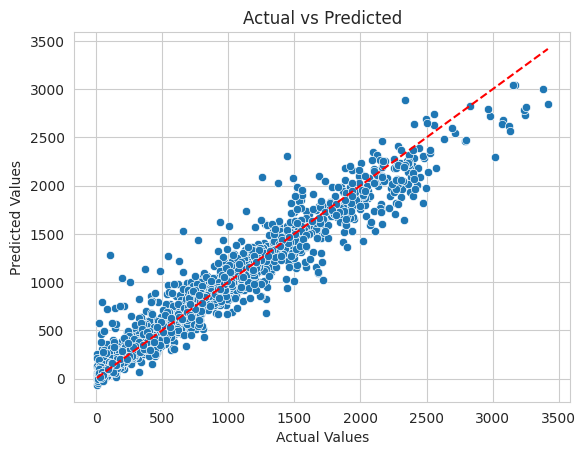

In [61]:
plt.figure()
sns.scatterplot(x='Actual', y='Prediction', data=Test_df)
plt.plot([Test_df['Actual'].min(), Test_df['Actual'].max()],
         [Test_df['Actual'].min(), Test_df['Actual'].max()],
         color='red', linestyle='--')  # perfect prediction line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

## Check Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

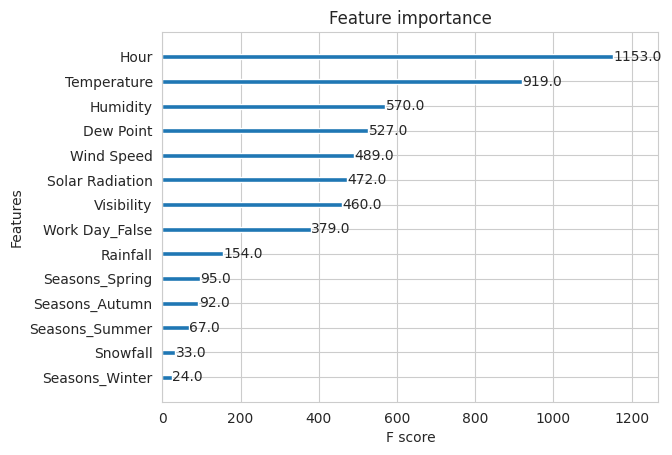

In [62]:
xgb.plot_importance(model)

In [63]:
mean_feature = X_enc_df.mean(numeric_only = True)
print(mean_feature)

Seasons_Autumn        0.228825
Seasons_Spring        0.255168
Seasons_Summer        0.260839
Seasons_Winter        0.255168
Work Day_False        0.325222
Work Day_True         0.674778
Hour                 11.507029
Temperature          12.771057
Humidity             58.147194
Wind Speed            1.725883
Visibility         1433.873479
Dew Point             3.944997
Solar Radiation       0.567868
Rainfall              0.149120
Snowfall              0.077685
dtype: float64
